In [ ]:
num_list = [3, 4, 5, 1, -44 , 5 ,10, 12 ,33, 1]
k = 3
sub_list = []
res = []
for ele in num_list:
  sub_list.append(ele)
  if len(sub_list) == k:
    res.append(max(sub_list))
    del (sub_list[0])

print(res)

[5, 5, 5, 5, 10, 12, 33, 33]


# Problem 1

In [ ]:
num_list = [3, 4, 5, 1, -44 , 5 ,10, 12 ,33, 1]
k = 4
res = []
for i in range(len(num_list) - k + 1):
  end_index = i + k
  sub_list = num_list[i:end_index]
  max_element = max(sub_list)
  print(f"{sub_list}\t=> max = {max_element}")
  res.append(max_element)
print("\nFinal result: ", res)

[3, 4, 5, 1]	=> max = 5
[4, 5, 1, -44]	=> max = 5
[5, 1, -44, 5]	=> max = 5
[1, -44, 5, 10]	=> max = 10
[-44, 5, 10, 12]	=> max = 12
[5, 10, 12, 33]	=> max = 33
[10, 12, 33, 1]	=> max = 33

Final result:  [5, 5, 5, 10, 12, 33, 33]


# Problem 2

In [ ]:
def intersection(lst1, lst2):
  index_received = []
  result = []
  for i in range(len(lst1)):
    for j in range(len(lst2)):
      if lst1[i] == lst2[j] and j not in index_received:
        result.append(lst1[i])
        index_received.append(j)
        break
  return result

In [ ]:
def intersection(lst1, lst2):
  result = []
  for i in range(len(lst1)):
    for j in range(len(lst2)):
      if lst1[i] == lst2[j]:
        result.append(lst1[i])
        lst2.pop(j)
        break
  return result

In [ ]:
num1=[1,1,1,2,3] num2 = [1,1,2,3]
intersection(num1, num2)

SyntaxError: ignored

In [ ]:
num_list1 = [1, 2, 2, 1]
num_list2 = [2, 1]
intersection(num_list1, num_list2)

[1, 2]

In [ ]:
num_list1 = [4, 9, 5]
num_list2 = [9, 4, 9, 8, 4]
intersection(num_list1, num_list2)

[4, 9]

# Problem 3

In [ ]:
import random
import math

In [ ]:
def generate_samples(n):
    y = []
    y_hat = []
    for i in range(n):
        y.append(random.uniform(0,10))
        y_hat.append(random.uniform(0,10))
    return y, y_hat

In [ ]:
def calc_mae(y, y_hat):
    result = 0
    num_samples = len(y)
    for i in range(num_samples):
        pred_sample = y[i]
        target_sample = y_hat[i]
        result += abs(target_sample-pred_sample)
    return result/num_samples

def calc_mse(y, y_hat):
    result = 0
    num_samples = len(y)
    for i in range(num_samples):
        pred_sample = y[i]
        target_sample = y_hat[i]
        result += (target_sample-pred_sample)**2
    return result/num_samples

def calc_huber(y, y_hat, delta=0.4):
    result = 0
    num_samples = len(y)
    for i in range(num_samples):
        pred_sample = y[i]
        target_sample = y_hat[i]
        if abs(pred_sample - target_sample) <= delta:
          result += (1 / 2) * ((pred_sample - target_sample) ** 2)
        else:
          result += delta * (abs(pred_sample - target_sample) - ((1 / 2) * delta))
    return result/num_samples

def exercise1():
    num_samples = input('Input number of samples (postive integer number) which are generated: ')
    if not num_samples.isdigit():
        print("number of samples must be a postive integer number")
        return # exit()
    
    num_samples = int(num_samples)
    if num_samples <= 0 :
        print("number of samples must be a postive integer number")
        return # exit()
    
    # check tên loss MAE, MSE, RMSE hoặc Huber Loss
    loss_name = input('Input loss name: ')
    if loss_name not in ['MAE', 'MSE', 'RMSE', 'Huber_Loss']:
        print(f"{loss_name} loss is not supported")
        return 
        
    
    # generate samples
    y, y_hat = generate_samples(num_samples)

    print(f"target: {y}")
    print(f"predict: {y_hat}")
    # check số lượng sample có generate đủ hay không 
    if (len(y) != num_samples) or (len(y_hat) != num_samples) or (len(y) != len(y_hat)):
        print("The number of samples is incorrect")
        return 

    final_loss = 0
    if loss_name == 'MAE':
        final_loss = calc_mae(y, y_hat)
    elif loss_name == 'MSE' or loss_name == 'RMSE':
        final_loss = calc_mse(y, y_hat)
    elif loss_name == 'Huber_Loss':
        final_loss = calc_huber(y, y_hat)

    if loss_name == 'RMSE':
        final_loss = math.sqrt(final_loss)

    print(f'{loss_name}: {final_loss}')   

    # return final_loss


In [ ]:
exercise1()

Input number of samples (postive integer number) which are generated: 3
Input loss name: Huber_Loss
target: [6.038626075776002, 8.002732200623992, 8.758921799180369]
predict: [6.527475307648728, 8.619467410207386, 7.516481474628993]
Huber_Loss: 0.23306996880099953


In [ ]:
exercise1()

Input number of samples (postive integer number) which are generated: 7
Input loss name: RMSE
target: [1.6327457620755537, 7.427936857777244, 3.406253676077612, 4.767855158347963, 2.0941514567812867, 5.1735728473622755, 9.515679981508043]
predict: [8.606607145169527, 4.416462690883663, 0.10483942051955464, 9.376737694256795, 8.04054419374555, 4.627237730284564, 6.191391450399464]
RMSE: 4.416750849170168


In [ ]:
exercise1()

Input number of samples (postive integer number) which are generated: 1
Input loss name: MSE
target: [5.530882784577084]
predict: [3.629096012269901]
MSE: 3.616792927322573


# Problem 4

Activation function:  sigmoid
Original data: [-3, -1, 0, 4, 7]
sigmoid(data) =  [0.04742587317756679, 0.2689414213699951, 0.5, 0.9820137900379085, 0.9990889488055994]
sigmoid'(data) =  [0.045176659730912144, 0.19661193324148185, 0.25, 0.017662706213291107, 0.000910221180121784]


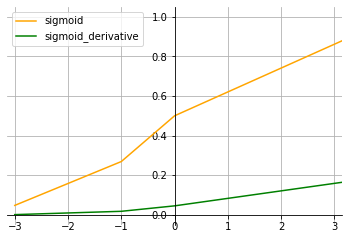

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def plot(data, output, output_derivative, activation_name):
  x = np.array(list(sorted(data)))
  y = np.array(list(sorted(output)))
  y_derivative = np.array(list(sorted(output_derivative)))
  ax = plt.gca()
  ax.spines['top'].set_color('none')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  plt.xlim(-np.pi, np.pi)
  plt.plot(x, y, color='orange', label=activation_name)
  plt.plot(x, y_derivative, color='green', label=f'{activation_name}_derivative')
  plt.grid(True)
  plt.legend()
  plt.show()

def tanh(x):
  return (2 / (1 + (math.e ** (-2 * x))) - 1)

def tanh_derivative(x):
  return 1 - (tanh(x) ** 2)

def sigmoid(x):
  return 1 / (1 + (math.e ** (-1 * x)))

def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
  return x if x > 0 else 0

def relu_derivative(x):
  return 1 if x > 0 else 0

def prelu(x, alpha=0.25):
  return x if x > 0 else alpha * x

def prelu_derivative(x, alpha=0.25):
  return 1 if x > 0 else alpha

def leaky_relu(x, alpha=0.01):
  return x if x > 0 else alpha * x

def leaky_relu_derivative(x, alpha=0.01):
  return 1 if x > 0 else alpha

def elu(x, alpha=0.01):
  return x if x > 0 else alpha * ((math.e ** x) - 1)

def elu_derivative(x, alpha=0.01):
  return 1 if x > 0 else alpha * (math.e ** x)

def softplus(x):
  return math.log(1 + (math.e ** x))

def softplus_derivative(x):
  return 1 / (1 + (math.e ** (-1 * x)))

def exponential(x):
  return math.e ** x

def exponential_derivative(x):
  return math.e ** x

def selu(x, lamda=1.05, alpha=1.67):
  return lamda * x if x > 0 else lamda * ((alpha * (math.e ** x)) - alpha)

def selu_derivative(x, lamda=1.05, alpha=1.67):
  return lamda if x > 0 else lamda * alpha * (math.e ** x)

def gelu(x):
  return 0.5 * x * (1 + tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * (x ** 3))))

def sech(x):
  return 2 / (math.e ** x + math.e ** (-1 * x))

def gelu_derivative(x):
  return 0.5 * tanh(0.0356774 * (x ** 3) + (0.797885 * x)) + (0.0535161 * (x ** 3) + (0.398942 * x)) * (sech(0.0356774 * (x ** 3) + (0.797885 * x)) ** 2) + 0.5

def hard_sigmoid(x):
  if x < -2.5:
    return 0
  elif x > 2.5:
    return 1
  else:
    return (0.2 * x) + 0.5

def hard_sigmoid_derivative(x):
  if x < -2.5:
    return 0
  elif x > 2.5:
    return 0
  else:
    return 0.2

def softsign(x):
  return x / (1 + abs(x))

def softsign_derivative(x):
  return 1 / ((1 + abs(x)) ** 2)

def swish(x):
  return x * sigmoid(x)

def swish_derivative(x):
  y = swish(x)
  return y + (sigmoid(x) * (1 - y))

def exercise3(data, activation_name='tanh'):
  if activation_name == 'tanh':
    output = [tanh(x) for x in data]
    derivative = [tanh_derivative(x) for x in data]
  elif activation_name == 'sigmoid':
    output = [sigmoid(x) for x in data]
    derivative = [sigmoid_derivative(x) for x in data]
  elif activation_name == 'relu':
    output = [relu(x) for x in data]
    derivative = [relu_derivative(x) for x in data]
  elif activation_name == 'prelu':
    output = [prelu(x) for x in data]
    derivative = [prelu_derivative(x) for x in data]
  elif activation_name == 'leaky_relu':
    output = [leaky_relu(x) for x in data]
    derivative = [leaky_relu_derivative(x) for x in data]
  elif activation_name == 'elu':
    output = [elu(x) for x in data]
    derivative = [elu_derivative(x) for x in data]
  elif activation_name == 'softplus':
    output = [softplus(x) for x in data]
    derivative = [softplus_derivative(x) for x in data]
  elif activation_name == 'exponential':
    output = [exponential(x) for x in data]
    derivative = [exponential_derivative(x) for x in data]
  elif activation_name == 'selu':
    output = [selu(x) for x in data]
    derivative = [selu_derivative(x) for x in data]
  elif activation_name == 'gelu':
    output = [gelu(x) for x in data]
    derivative = [gelu_derivative(x) for x in data]
  elif activation_name == 'hard_sigmoid':
    output = [hard_sigmoid(x) for x in data]
    derivative = [hard_sigmoid_derivative(x) for x in data]
  elif activation_name == 'softsign':
    output = [softsign(x) for x in data]
    derivative = [softsign_derivative(x) for x in data]
  elif activation_name == 'swish':
    output = [swish(x) for x in data]
    derivative = [swish_derivative(x) for x in data]
  else:
    print('Activation name invalid !')
    return

  print('Activation function: ', activation_name)
  print('Original data:', data)
  print(f'{activation_name}(data) = ', output)
  print(f"{activation_name}'(data) = ", derivative)
  plot(data, output, derivative, activation_name)

data = [-3, -1, 0, 4, 7]
exercise3(data, activation_name='sigmoid')

Activation function:  swish
Original data: [-3, -1, 0, 4, 7]
swish(data) =  [-0.14227761953270035, -0.2689414213699951, 0.0, 3.928055160151634, 6.993622641639195]
swish'(data) =  [-0.08810410601516963, 0.07232948812851331, 0.5, 1.0526646148910728, 1.0054604970664522]


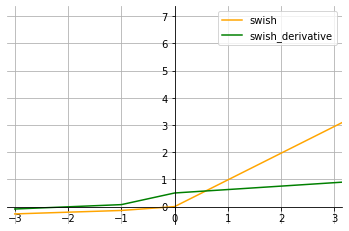

In [ ]:
data = [-3, -1, 0, 4, 7]
exercise3(data, activation_name='swish')

# Problem 5

In [ ]:
def binary_search(sorted_lst, left_index, right_index, x):
  while left_index <= right_index:
    mid_index = left_index + (right_index - left_index) // 2
    if sorted_lst[mid_index] == x:
      return mid_index
    elif sorted_lst[mid_index] < x:
      left_index = mid_index + 1
    else:
      right_index = mid_index - 1
  return -1

In [ ]:
lst = [0, 1, 2, 3,3, 4, 5, 6, 7, 8, 9, 10]
x = 3
print(binary_search(lst, 0, len(lst) - 1, x))

3
